In [64]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import pandas as pd
import h5py
import scipy
from scipy import stats

### HERA Labs 7 & 8¶
This is a set of things to explore for Lab 7 & 8 if you are using the HERA dataset. As described in lecture, you will turn in an in-progress lab for lab 7, but it will not be graded. A single combined lab 7 & 8 will be turned in at the end, and given double weight in the grading.

The ultimate goal in the following is to a) Identify contaminants, and remove them from the dataset b) Determine how much more sensitive your measurement is after the cuts (compared to before)

If the data size is getting unwieldy, feel free to use only part of the file.

In [14]:
uv = UVData()
uv.read('zen.2459122.48015.mini.sum.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(#times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(#times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


### Signal removal
The data contains both sky signal (good) and contamination (bad). To make a background distribution, we really need to remove the sky signal. The sky signal in this data is very steady in time. Most of the sources are distant radio galaxies who's intensity (brightness) is steady over millions of years, and they move slowly across the sky. But our measurements are every ~10 seconds. So we can remove the astrophysical signals by subtracting neighboring time samples. Many of the contaminants have a lot of variability, either because the brightness is quickly fluctuating or they are rapidly moving on the sky. So this procedure will remove most of the sky signal, but much of the contamination we are looking for will remain.

After you do this you sould have the following axes:  𝑣𝑎𝑏 ,  Δ𝑡=𝑡𝑛+1−𝑡𝑛 , and  𝑓 , and we'll use this for the duration. You will also want to ignore when  𝑎=𝑏  measurements (e.g.  𝑣𝑎𝑎  if they exist).

In [47]:
antenna1 = 90
antenna2 = 53

In [52]:
data = np.abs(uv.get_data(antenna1,antenna2))
data1=data[0:19]
print(np.abs(data[0]))
print()
print(np.abs(data[1]))
print()
for i in range(19):
    data1[i]=data[i+1]-data[i]
print(data1)

[ 6300.26602613  4639.91206813  7815.18649809 ...  3821.45129499
 18166.89780893  5823.10054868]

[ 1194.22150374  3667.21965527  6850.68536717 ... 12966.96055365
 13537.75380187 12861.7449827 ]

[[  -5106.04452239    -972.69241286    -964.50113092 ...    9145.50925866
    -4629.14400706    7038.64443402]
 [   2703.52720545    2276.09802091    -688.9593103  ...   43555.95243745
   287883.86331608   36348.46031051]
 [  -1368.8778149    -1546.61845972     649.51178951 ...  -42062.29028667
  -291784.61358988  -32350.50230057]
 ...
 [   1207.34444293    1948.90340418    4574.54143312 ...    3219.90305562
     2105.45002787    1216.25426055]
 [    886.8258379     -490.13468352    1768.88224236 ...  -10420.77145082
     3014.35654739   -5886.75364362]
 [  -1460.00352924   -3688.79347249   -3407.12727845 ...    6424.14424536
    -4435.67209412    -808.07297315]]


### Waterfall plots¶
One particularly usefull plot is a waterfall plot (why it is called this is very obscure), a plot of the power  𝑣  vs. time and frequency. The idea is to have a 2D plot showing the magnitude of the visibility  |𝑣𝑎𝑏|  versus time and frequency, with all axes labelled and in the appropriate units.

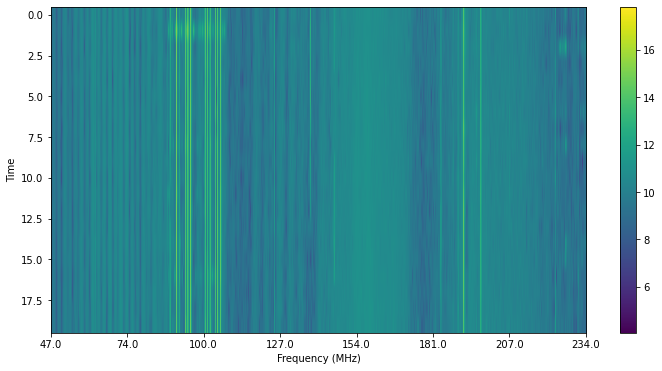

In [42]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data)),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

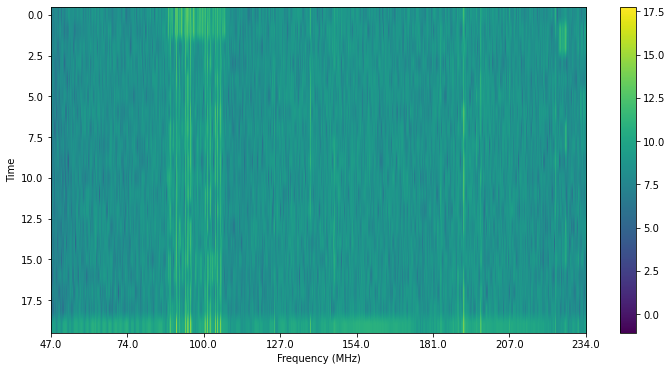

In [43]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data1)),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

### Single antenna pair plots
Pick the visibilities from a single antenna pair. Plot both the waterfall and a histogram of the magnitude of the visibility.

Comment on why we are histogramming the magnitude. Describe the basic shape.

In [44]:
freq = uv.freq_array[0]*1e-6
print(len(freq))
antnums = sorted(uv.antenna_numbers)
print(len(antnums))
times = np.unique(uv.time_array)
print(times)
data = uv.get_data((50,93))[0]
print(np.shape(data))

1536
104
[2459122.48009276 2459122.48020461 2459122.48031646 2459122.48042831
 2459122.48054015 2459122.480652   2459122.48076385 2459122.4808757
 2459122.48098755 2459122.4810994  2459122.48121124 2459122.48132309
 2459122.48143494 2459122.48154679 2459122.48165864 2459122.48177048
 2459122.48188233 2459122.48199418 2459122.48210603 2459122.48221788]
(1536,)


Text(0.5, 1.0, 'Antenna 50 & 93 autospectra')

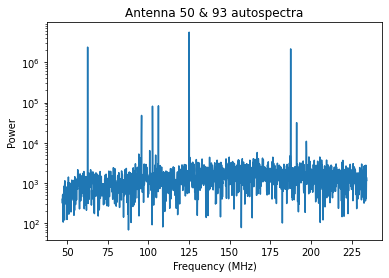

In [46]:
fig = plt.figure()
plt.plot(freq, np.abs(data))
plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power')
plt.title('Antenna 50 & 93 autospectra')

29184


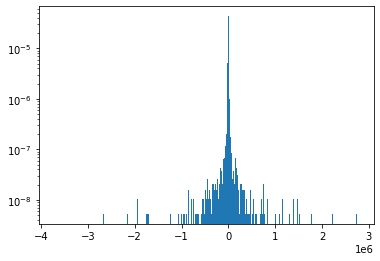

In [54]:
dat1=[]
for i in range(19):
    for j in range(1536):
        dat1.append(data1[i][j])
print(len(dat1))

plt.hist(dat1, bins=1000, density=True)
plt.yscale('log')
plt.show()

### Average visibility plots
If a signal comes from far away, we will expect to see it in all antenna pairs. So to increase our sensitivity we can average all of the baseline pairs (make sure to not include the  𝑣𝑎𝑎  values). But because the visibilities are complex, we have to be careful. What we really want is the average of the magnitudes  <|𝑣|>𝑎𝑏 , where  𝑎  and  𝑏  cover all values  𝑎≠𝑏 .

Make the associated waterfall and histogram plots, explore and describe.

If your distribution is not centered at zero it may be useful to subtract the average value. If you go down this road, explore whether you want to subtract the global average, or an average per frequency or per time.

In [85]:
pairs = uv.get_antpairs()
#this is a good start on creating a 3D array of visibility values for all antenna pairs (except when a=a)
data = abs(uv.get_data(1,14))
data1 = abs(uv.get_data(1,23))
data2 = abs(uv.get_data(1,26))
print(data[0])
print()
print(data1[0])
tot_dat = np.dstack((data,data1,data2))
print(np.average(tot_dat[0][0]))

[17834.38549544 14843.77984208 15568.9527265  ... 13631.68547906
 11678.13807933 10135.51858565]

[ 858.9412087   765.27772736 2232.73218278 ... 1588.42595043  879.2769757
  957.48524793]
10110.570748366066


In [86]:
total_dat = []
for i in range(666):
    temp = []
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    if ant1 == ant2:
        continue
    data = abs(uv.get_data(ant1,ant2))
    temp = data[0:19]
    for j in range(19):
        temp[j] = (data[j+1]-data[j])
    total_dat.append(temp)

In [87]:
total_dat1 = np.average(total_dat, axis=0)

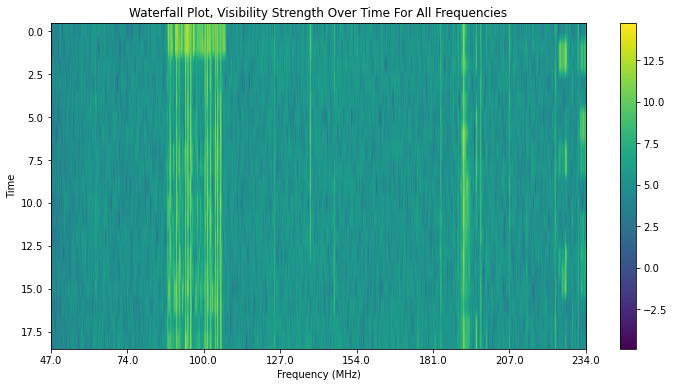

In [88]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(total_dat1)),aspect='auto')
plt.title('Waterfall Plot, Visibility Strength Over Time For All Frequencies')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

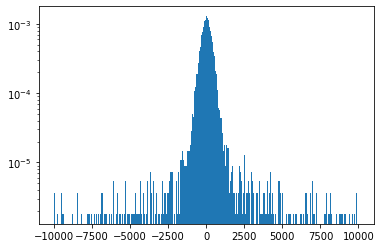

In [89]:
newlist = []
for i in range(19):
    for j in range(1536):
        newlist.append((total_dat1[i][j]))


plt.hist(newlist, bins=1000, density = True, range = (-10000,10000))
plt.yscale('log')
plt.show()

### Feature exploration
Describe the features you are seeing as accurately as you can. For some of the data files the following might be helpful https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg

From the given image we can see that these bright signals between 87.5 MHz and 108.0 MHz are most likely Broadcasting signals.

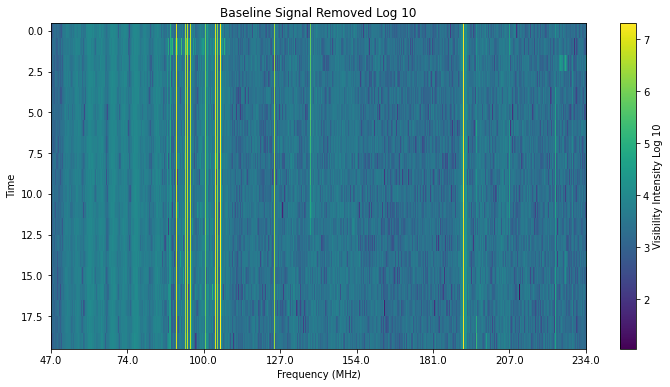

In [108]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(data1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline Signal Removed Log 10')
#plt.xlim(300,500)
plt.show()

Using the chart we see that

1927.0


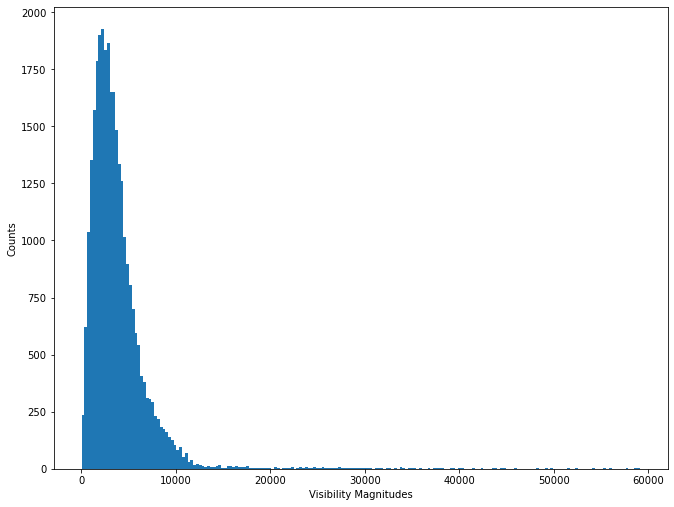

In [109]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(data1).flatten()
#vro1=sr1f[200:1400]
vro1 = sr1f[sr1f < 6e4]
#plt.yscale('log')
n=plt.hist(vro1,bins=200);
print(n[0].max())
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

348.0


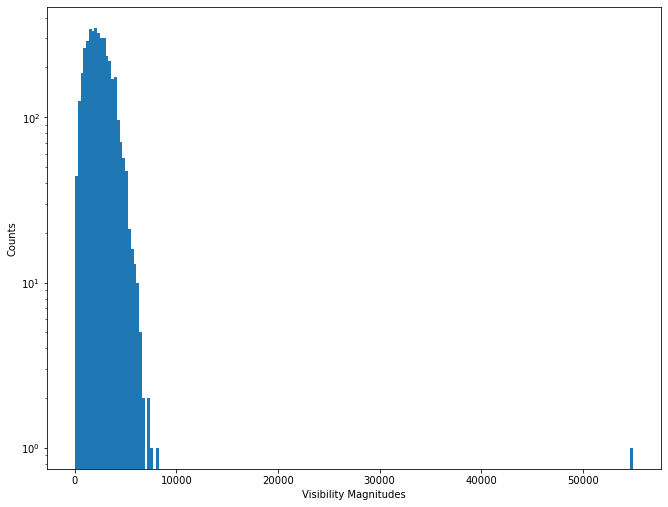

In [110]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(data1[:,900:1100]).flatten()
vro1=sr1f
vro1 = vro1[vro1 <6e4]
plt.yscale('log')
n=plt.hist(vro1,bins=200);
print(n[0].max())
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

In [111]:
data1[::].shape

(20, 1536)

### Jackknife plots
You may be seeing features already, but there may be features that are still below the level you can see by eye. For this we will need a jackknife test. The steps to any jackknife test are:

a) Come up with a concern (state clearly)

b) Identify a data cut, where if the concern is true the contamination should appear in one data set but not the other.

c) Calculate the histograms for each dataset, including the error bars on the histogram. Plot the histograms.

d) For the actual jackknife, subtract the histograms and see whether they are consistent to within the expected error (note the errors on the difference are not identical to the errors on each histogram individually.).

Perform a jackknife test or two. Clearly describe whether the jackknife passed (statistically identical) or failed (there is a difference), and what this means about your initial concern in part a).

Jackknife Part a):
Concern: very noisy contaminated data from 80 to 110 MHz

Jackknife Part b):
Cut all values there

Identify concern, make data cut around that region Start with frequency, assume problem parts are within first third of time, take that chunk of data, take all frequencies, make histogram with error bars, and another hist of remaining data

In [112]:
cut_total_dat = []
for i in range(666):
    temp1 = []
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    if ant1 == ant2:
        continue
    data5 = abs(uv.get_data(ant1,ant2))
    temp1 = data5[0:19]
    for j in range(19):
        temp1[j] = (data5[j+1]-data5[j])
    cut_total_dat.append(temp1)

In [113]:
cut_total_dat1 = np.average(cut_total_dat, axis=0)

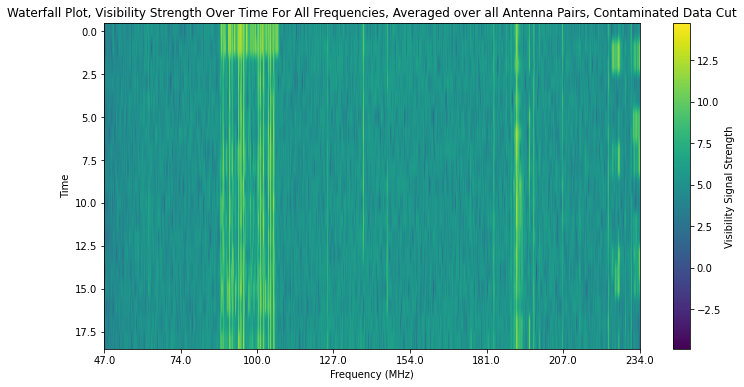

In [114]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(cut_total_dat1)),aspect='auto')
plt.title('Waterfall Plot, Visibility Strength Over Time For All Frequencies, Averaged over all Antenna Pairs, Contaminated Data Cut')
cbar = fig.colorbar(im)
cbar.set_label('Visibility Signal Strength', rotation = 90)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

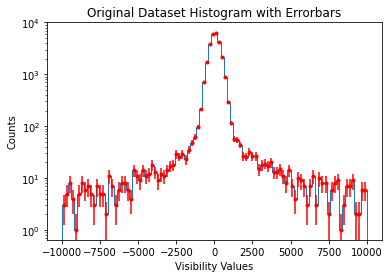

In [115]:
entries1, edges1, _1 = plt.hist(newlist, bins = 100, density = False, range = (-10000,10000), histtype = 'step')
bincenters1 = .5 * (edges1[:-1] + edges1[1:])
plt.errorbar(bincenters1, entries1, yerr=np.sqrt(entries1),fmt='r.')
plt.yscale('log')
plt.ylabel('Counts')
plt.xlabel('Visibility Values')
plt.title('Original Dataset Histogram with Errorbars')
plt.show()

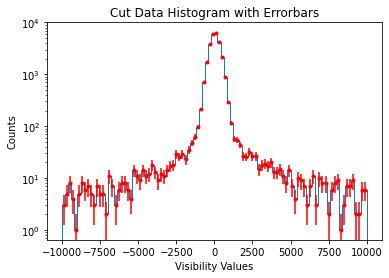

In [116]:
newlist_cut = []
for i in range(19):
    for j in range(1536):
        newlist_cut.append((cut_total_dat1[i][j]))


entries, edges, _ = plt.hist(newlist_cut, bins=100, density = False, range = (-10000,10000), histtype = 'step')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.')
plt.yscale('log')
plt.title('Cut Data Histogram with Errorbars')
plt.ylabel('Counts')
plt.xlabel('Visibility Values')
plt.show()

In [117]:
comb_cut = []
for i in range(len(newlist)):
    comb_cut.append((newlist[i])-(newlist_cut[i]))

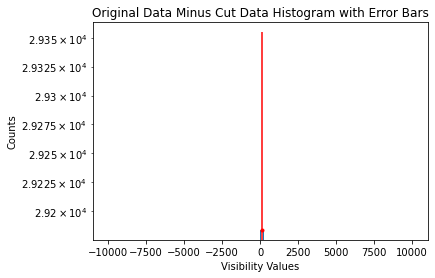

In [118]:
entries2, edges2, _2 = plt.hist(comb_cut, bins=100, density = False, range = (-10000,10000), histtype = 'step')
bin_centers2 = 0.5 * (edges2[:-1] + edges2[1:])
plt.errorbar(bin_centers2, entries2, yerr=np.sqrt(entries2), fmt='r.')
plt.yscale('log')
plt.title('Original Data Minus Cut Data Histogram with Error Bars')
plt.ylabel('Counts')
plt.xlabel('Visibility Values')
plt.show()

In [ ]:

Based on the histogram of the original data set minus the data set without the contamination (cut data), we see that there is a statistical difference, in other words they are not identical, so the Jackknife test failed. This means we do have to consider the concern that was raised in part a.), and that removing the data in the 80-110 MHz range would probably be a good idea in order to minimize the amount of bad data the antennas pick up.

### Data cuts
Based on your identified features and jackknife tests, come up with a set of cuts to remove contaminated data.

After your cuts, recalculate the average visibility histogram, and compare it to what you had before.

If you had a candidate signal in this space, what is the significance of your detection before and after removing the contamination? Discuss in detail. This is the key step in the entire course, so really think about it. Normally we'd want to include as much data as possible to increase sensitivity, but here we are choosing to remove data. Why?

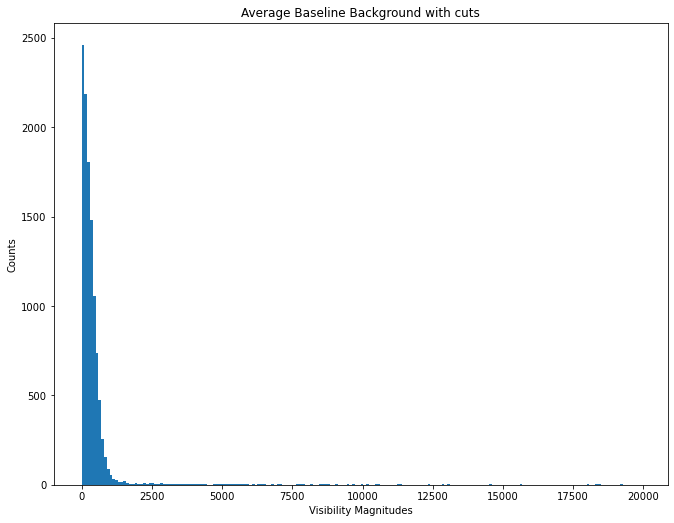

In [105]:
fig,ax=plt.subplots(figsize=(11,8.5))
fl = np.abs((total_dat1[:,800:1400].flatten()))
vro3 = fl[fl < 2e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n1,bins,p=plt.hist(vro3,bins=200);
plt.title('Average Baseline Background with cuts')
plt.xlabel('Visibility Magnitudes')
plt.ylabel('Counts');

By removing contamination we are able to attain more accurate measurements. By removing useless data, we are more likely to make observations about the data leading to a greater chance of making a discovery.